## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import sounddevice as sd
%matplotlib inline

## Plot wave

In [2]:
def plot_wave(wave,title):
    plt.figure()
    plt.plot(wave)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

In [7]:
def plot2wave(wave1,wave2):
    plt.figure()
    plt.plot(wave1)
    plt.plot(wave2)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title('Waveform of Test Audio')
    plt.show()

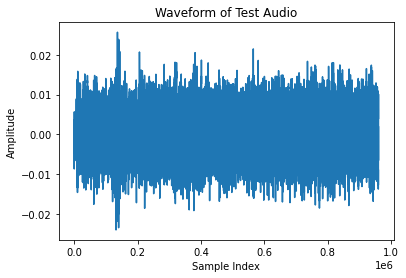

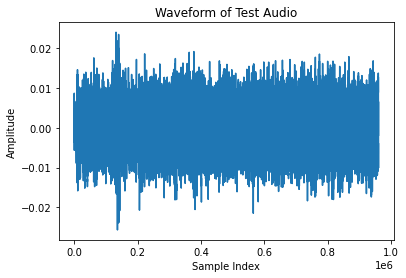

In [32]:
seconds = 20
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1
fanrecording = sd.rec(int(seconds * fs))
sd.wait()  # Wait until recording is finished
inverse_fanrecording = -1 * fanrecording
write('fan_record.wav', fs, fanrecording)  # Save as WAV file 
write('fan_record_invert.wav', fs, inverse_fanrecording)  # Save as WAV file 
plot_wave(fanrecording)
plot_wave(inverse_fanrecording)

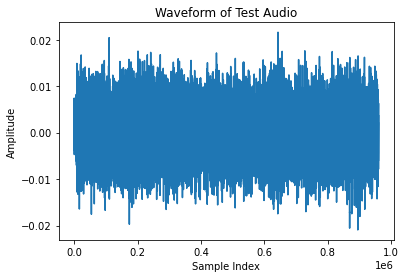

In [34]:
seconds = 20
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1
test_fan_record = sd.rec(int(seconds * fs))
sd.wait()  # Wait until recording is finished
write('test_fan_record.wav', fs, test_fan_record)  # Save as WAV file 
plot_wave(test_fan_record)

In [8]:
def cal_amplitude(wave):
    return np.sum(np.absolute(wave)*100)

In [133]:
start_num = 10000
end_num = 190000
#print(normal_fan[start_num:end_num])
#print(inverse_fanrecording[start_num:end_num])
#print( normal_fan[start_num:end_num] + inverse_fanrecording[start_num:end_num])
#print( np.sum(normal_fan[start_num:end_num] + inverse_fanrecording[start_num:end_num]))
amp_arr = []
min_amp_shift = 0
min_amp = None
for shift in range(10000):

    amp = cal_amplitude(fanrecording[start_num:end_num]+inverse_fanrecording[start_num+shift:end_num+shift])
    amp_arr.append(amp)
    if(min_amp == None):
        min_amp = amp
    elif(amp<min_amp):
        min_amp = amp
        min_amp_shift = shift



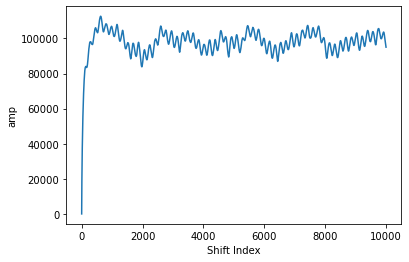

min_amp: 0.0
min_amp_shift 0


In [134]:
    plt.figure()
    plt.plot(amp_arr)
    plt.xlabel('Shift Index')
    plt.ylabel('amp')
    plt.show()
    print('min_amp:',min_amp)
    print('min_amp_shift',min_amp_shift)

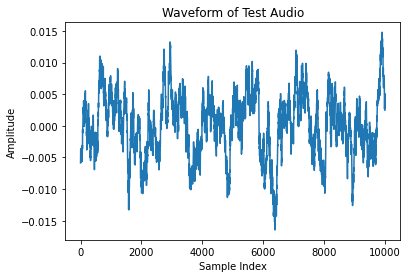

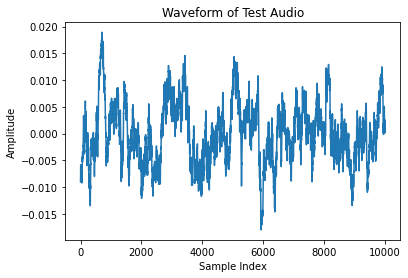

85769.38
65364.742
[[ 1.3044868e-07]
 [ 4.0494090e-08]
 [ 6.7992914e-08]
 [ 3.0851517e-08]
 [-8.6371139e-11]]
35.05022


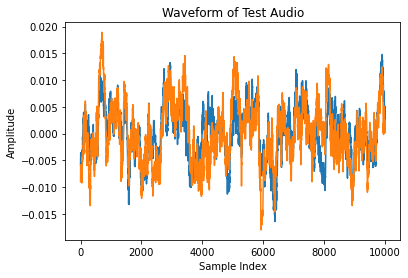

In [132]:
plot_wave(test_fan_record[10000:20000])
plot_wave(test_fan_record[10000:20000] - fanrecording[10000+min_amp_shift:20000+min_amp_shift])
print(cal_amplitude(test_fan_record[start_num:end_num]+inverse_fanrecording[start_num+min_amp_shift:end_num+min_amp_shift]))
print(cal_amplitude(test_fan_record[start_num:end_num]))
#print(test_fan_record[:1000])
print(test_fan_record[:5]/10000)
duration=98
start=10000
print(cal_amplitude(test_fan_record[start:start+duration]) )
plot2wave(test_fan_record[10000:20000],test_fan_record[10000:20000]+inverse_fanrecording[10000+min_amp_shift:20000+min_amp_shift])

## Read Audio Input

You can use scipy.io.wavefile to read and write a wav file. 
Usually audio file contains two channels (left and right). We will only keep one channel for simplicity. In the code below, "data = data[:,0]" will keep channel 0.

In [120]:
Fs, data = read('test.wav')
print(data.shape)
data = data[:,0]



print("Sampling Frequency is", Fs)

FileNotFoundError: [Errno 2] No such file or directory: 'test.wav'

In [ ]:
print(data)
print(-1 * data)

[  0   0   0 ... 385 412 359]
[   0    0    0 ... -385 -412 -359]


In [ ]:
x = np.arange(Fs)
y = 10000 * np.sin(2 * np.pi * 500 * Fs * x / Fs)
print(y)

[ 0.00000000e+00  1.33330705e-09  2.66661410e-09 ... -1.11655973e-04
  1.40284329e-05 -1.58310385e-04]


## Play Audio

You can use IPython.display.Audio to play audio.

In [ ]:
Audio(data, rate=Fs)

## Plot the wave

We use matplotlib.pyplot to plot the signal. To produce a plot between cells in Jupyter Notebook, you need to add "%matplotlib inline" 

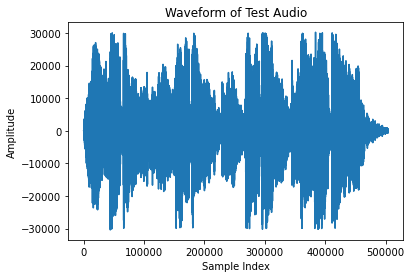

In [ ]:
plt.figure()
plt.plot(data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio')
plt.show()

## Write Audio File

In [ ]:
write('output.wav', Fs, data)
write('output_inverse.wav',Fs,-1 * data)

In [ ]:
sd.play(data,Fs)
sd.play(-1 * data,Fs)

In [ ]:
sd.play(y,Fs)

In [49]:
tmp_ = read('new_fan_record.wav')
fanrecording = np.array(tmp_[1],dtype=np.float32)
inverse_fanrecording = -1 * fanrecording

In [50]:
'''seconds = 20
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1
fanrecording = sd.rec(int(seconds * fs))
sd.wait()  # Wait until recording is finished
inverse_fanrecording = -1 * fanrecording
write('new_fan_record.wav', fs, fanrecording)  # Save as WAV file 
write('new_fan_record_invert.wav', fs, inverse_fanrecording)  # Save as WAV file '''


"seconds = 20\nfs = 48000\nsd.default.samplerate = fs\nsd.default.channels = 1\nfanrecording = sd.rec(int(seconds * fs))\nsd.wait()  # Wait until recording is finished\ninverse_fanrecording = -1 * fanrecording\nwrite('new_fan_record.wav', fs, fanrecording)  # Save as WAV file \nwrite('new_fan_record_invert.wav', fs, inverse_fanrecording)  # Save as WAV file "

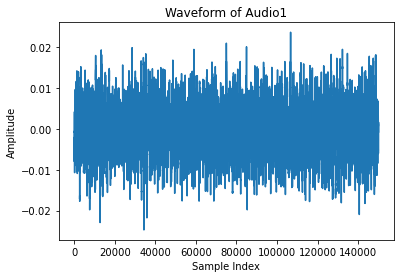

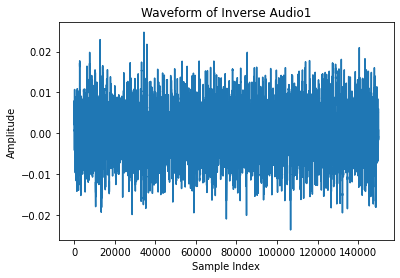

In [64]:
plot_wave(fanrecording[400000:550000],'Waveform of Audio1')
plot_wave(inverse_fanrecording[400000:550000],'Waveform of Inverse Audio1')

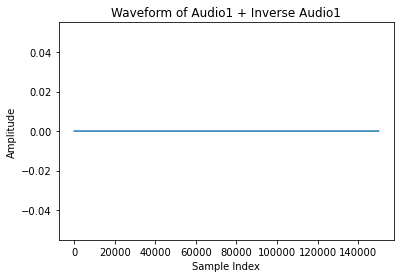

In [65]:
plot_wave(fanrecording[400000:550000]+inverse_fanrecording[400000:550000],'Waveform of Audio1 + Inverse Audio1')

In [66]:
tmp = read('土地銀行94.wav')

(1005568,)


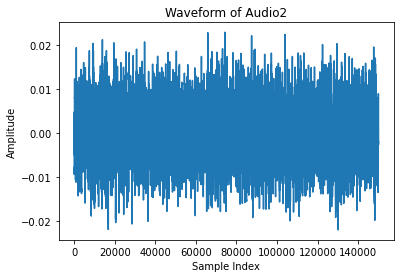

In [67]:

recording_new = np.array(tmp[1],dtype=np.float32)

print(recording_new.shape)
recording_new /= 20000
plot_wave(recording_new[400000:550000],'Waveform of Audio2')

In [68]:
start_num = 400000
end_num = 550000
#print(normal_fan[start_num:end_num])
#print(inverse_fanrecording[start_num:end_num])
#print( normal_fan[start_num:end_num] + inverse_fanrecording[start_num:end_num])
#print( np.sum(normal_fan[start_num:end_num] + inverse_fanrecording[start_num:end_num]))
amp_arr = []
min_amp_shift = 0
min_amp = None
for shift in range(10000):

    amp = cal_amplitude(recording_new[start_num:end_num]+inverse_fanrecording[start_num+shift:end_num+shift])
    amp_arr.append(amp)
    if(min_amp == None):
        min_amp = amp
    elif(amp<min_amp):
        min_amp = amp
        min_amp_shift = shift

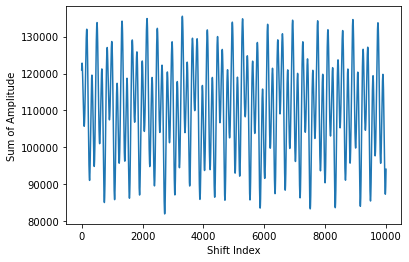

min_amp: 81980.805
min_amp_shift: 2727
Audio 2 original_amp: 80113.01


In [69]:
plt.figure()
plt.plot(amp_arr)
plt.xlabel('Shift Index')
plt.ylabel('Sum of Amplitude')
plt.show()
print('min_amp:',min_amp)
print('min_amp_shift:',min_amp_shift)
print('Audio 2 original_amp:',cal_amplitude(recording_new[start_num:end_num]))

In [70]:
print(cal_amplitude(recording_new[start_num:end_num]+inverse_fanrecording[start_num+min_amp_shift:end_num+min_amp_shift]))
print(cal_amplitude(recording_new[start_num:end_num]))
print(cal_amplitude(inverse_fanrecording[start_num+min_amp_shift:end_num+min_amp_shift]))

81980.805
80113.01
76763.805


In [71]:
start_num = 400000
end_num = 550000
#print(normal_fan[start_num:end_num])
#print(inverse_fanrecording[start_num:end_num])
#print( normal_fan[start_num:end_num] + inverse_fanrecording[start_num:end_num])
#print( np.sum(normal_fan[start_num:end_num] + inverse_fanrecording[start_num:end_num]))
amp_arr = []
min_amp_shift = 0
min_amp = None
for shift in range(10000):

    amp = cal_amplitude(fanrecording[start_num:end_num]+inverse_fanrecording[start_num+shift:end_num+shift])
    amp_arr.append(amp)
    if(min_amp == None):
        min_amp = amp
    elif(amp<min_amp):
        min_amp = amp
        min_amp_shift = shift

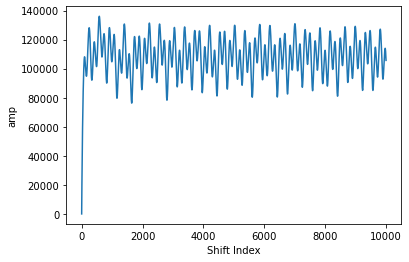

min_amp: 0.0
min_amp_shift: 0
Audio 1 original amp: 76636.57


In [72]:
plt.figure()
plt.plot(amp_arr)
plt.xlabel('Shift Index')
plt.ylabel('amp')
plt.show()
print('min_amp:',min_amp)
print('min_amp_shift:',min_amp_shift)
print('Audio 1 original amp:',cal_amplitude(fanrecording[start_num:end_num]))

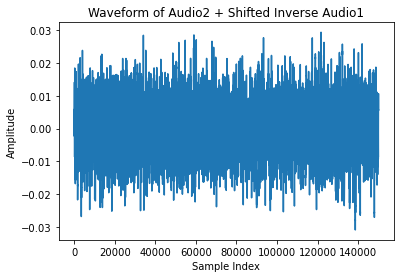

In [73]:
plot_wave(fanrecording[start_num:end_num]+inverse_fanrecording[start_num+shift:end_num+shift],'Waveform of Audio2 + Shifted Inverse Audio1')

In [74]:
print(cal_amplitude(fanrecording[start_num:end_num]+inverse_fanrecording[start_num+min_amp_shift:end_num+min_amp_shift]))
print(cal_amplitude(fanrecording[start_num:end_num]))
print(cal_amplitude(inverse_fanrecording[start_num+min_amp_shift:end_num+min_amp_shift]))

0.0
76636.57
76636.57


In [75]:
start_output = 200000
end_output = 700000
fs = 48000
exp2_shift= 2727
print(fanrecording.dtype)

float32


In [76]:
write('audio1.wav', fs, fanrecording[start_output:end_output])  # Save as WAV file 
write('inverse_audio1.wav', fs, inverse_fanrecording[start_output:end_output])  # Save as WAV file 
write('audio2.wav', fs, recording_new[start_output:end_output])  # Save as WAV file 
write('shift_inverse_audio1.wav', fs, inverse_fanrecording[start_output+exp2_shift:end_output+exp2_shift])  # Save as WAV file 